For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

- Is the website redesign any good?

    - Ho = There is no difference between the old web design and the new web design.
    - Ha = The new website design is better than the old website design.

    - True positive (correctly reject Null Hypothesis): 
    We correctly reject the Ho based off of a low p-value, there was an effect accoding to the Ha.
    
    - True Negative (correctly accept(fail to reject) the Null Hypothesis): 
    We correctly fail to reject the Ho based off of a high p-value, higher than our alpha, no significant effect.
   
    - Type I error (Null Hypothesis is True but we reject it): 
    We wrongly reject the Ho based on our sample data but the Ho was actually correct. The web design had no effect.
    
    - Type II error (Null Hypothesis is False and we don't reject it):
    We wrongly failed to reject the Ho based on our sample data that web design had no effect but the Ho was actually
    incorrect. The web design had an effect.

- Is our television ad driving more sales?

    - Ho = Our television ad makes no difference in sales.
    - Ha = Our television ad is driving more in sales.

    - True positive (correctly reject Null Hypothesis): 
    We correctly reject the Ho based on the fact our p-value is lower than our alpha. Our television ad is driving
    more in sales.
    
    - True Negative (correctly accept(fail to reject) the Null Hypothesis):
    We correctly fail to reject the Ho, our television ad makes no difference in sales. The p-value is higher than
    our alpha.
   
    - Type I error (Null Hypothesis is True but we reject it):
    We wrongly reject our Ho based on our sample data, but the Ho was actually correct. Our television add makes no
    differene in sales.
   
    - Type II error (Null Hypothesis is False and we don't reject it):
    We wrongly failed to reject the Ho based on sample data. Our sample data said the television ads made no 
    difference in sales but our television ads were driving more in sales, had an effect.

- Has the network latency gone up since we switched internet service providers?

    - Ho = There is no difference in the network latency since we switched internet service providers.
    - Ha = The network latency had gone up since we switched internet service providers.

    - True positive (correctly reject Null Hypothesis): 
    We correctly reject the Ho based on a low p-value, lower than our alpha. There is a difference/a change in the 
    network latency since we switched internet service providers.
    
    - True Negative (correctly accept(fail to reject) the Null Hypothesis):
    We correctly fail to reject the Ho, the network latency did not change since we switched internet service 
    providers. The p-value is greater than our alpha.
    
    - Type I error (Null Hypothesis is True but we reject it):
    We wrongly rejected our Ho based on sample data, but the Ho was actually correct, there is no difference in 
    network latency since switching internet service providers.
    
    - Type II error (Null Hypothesis is False and we don't reject it):
    We wrongly fail to reject the Ho based on sample data. The latency has changed since switching internet service
    providers and had an effect.
    

# T-Test

In [ ]:
# t-test for one sample - one subgroup to the population, wiht a sequence and a scalar
stats.ttest_1samp(series/array/etc , mean)
# (sequence of values: list, population average: float)

# t-test for 2 samples - comparing 2 subgroups, with 2 sequences
stats.test_ind(series 1, series 2)
# (sequence of values 1: list, sequence of values 2: list)

In [51]:
#4. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.

# two sample t-test
import math
from scipy import stats

# office_1 
one_mean = 90
one_std = 15
n1 = 40

# office_2
two_mean = 100
two_std = 20
n2 = 50

# Null Hypothesis: There is no difference in time it takes to sell homes between the two offices.
# Alternative Hypothesis: There is a difference between the average time it takes to sell homes between the two offices.

t = (two_mean - one_mean) / (two_std/math.sqrt(n2))
print('t:', t)

p = stats.t(n2 - 1).sf(t)*2
print('p-value:' ,p)


# T = 3.536
# p-value = 0.0009
# With a p-value of 0.0009, less than 0.05, we reject the null hypothesis.

t: 3.5355339059327378
p-value: 0.0009000029669488137


In [153]:
#5. Load the mpg dataset and use it to answer the following questions:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
mpg = data('mpg')
mpg.trans = mpg.trans.str[:-4]
mpg.head(5)

#Ho = There is no difference in fuel-efficiency in cars from 2008 vs 1999.
#Ha = There is a difference in fuel-efficiency in cars from 2008 vs 1999.

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [68]:
# Example:
# $H_0$: automatic cars have the same city mileage as the overall population
# $H_a$: automatic cars do not have the same city mileage as the overall population
    
pop_city_mileage = mpg.cty.mean()
pop_city_mileage
auto_city_mileage = mpg[mpg.trans == 'auto'].cty
t_stat, p = stats.ttest_1samp(auto_city_mileage, pop_city_mileage)
print('t-stat:' ,t_stat)
print('p-value:', p)

t-stat: -2.9001322447463838
p-value: 0.004268839797630685


In [73]:
##- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
oh_eight = mpg[mpg.year == '2008'].cty
oh_eight

nine_nine = mpg[mpg.year == '1999'].cty
nine_nine

Series([], Name: cty, dtype: int64)

In [65]:
#- Are compact cars more fuel-efficient than the average car?

compact_cars_city = mpg[mpg['class'] == 'compact'].cty
compact_cars_city.mean()

average_cars_city = mpg[mpg['class'] == 'midsize'].cty
average_cars_city.mean()

print('city:', stats.ttest_ind(compact_cars_city, average_cars_city))

compact_cars_hwy = mpg[mpg['class'] == 'compact'].hwy
compact_cars_hwy.mean()

average_cars_hwy = mpg[mpg['class'] == 'midsize'].hwy
average_cars_hwy.mean()

print('hwy:', stats.ttest_ind(compact_cars_hwy, average_cars_hwy))

city: Ttest_indResult(statistic=2.2845195147123536, pvalue=0.024803276085898066)
hwy: Ttest_indResult(statistic=1.5047866343782912, pvalue=0.1360428929931519)


In [28]:
#- Do manual cars get better gas mileage than automatic cars?
manual_cars_city = mpg[mpg.trans == 'manual'].cty
manual_cars_city.mean()

auto_cars_city = mpg[mpg.trans == 'auto'].cty
auto_cars_city.mean()

print('city:', stats.ttest_ind(manual_cars_city, auto_cars_city))

manual_cars_hwy = mpg[mpg.trans == 'manual'].hwy
manual_cars_hwy.mean()

auto_cars_hwy = mpg[mpg.trans == 'auto'].hwy
auto_cars_hwy.mean()

print('hwy:', stats.ttest_ind(manual_cars_hwy, auto_cars_hwy))

city: Ttest_indResult(statistic=4.781718413818975, pvalue=3.088973514167085e-06)
hwy: Ttest_indResult(statistic=4.368349972819688, pvalue=1.888044765552951e-05)


# Correlation

(0.24604059691061692, 1.820659268201368e-97)


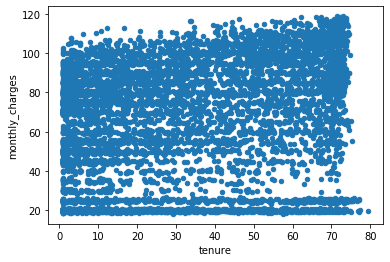

In [45]:
#1. Use the telco_churn data. 

telco = pd.read_excel("my_telco_churn.xlsx")
# this line of code drops any 'na' values
telco = telco.iloc[:,:-3].dropna()
telco

# Does tenure correlate with monthly charges? 

x = telco.tenure
y = telco.monthly_charges
print(stats.pearsonr(telco.tenure, telco.monthly_charges))
telco.plot.scatter(x = 'tenure', y ='monthly_charges')

# No correlation

(0.8257411779462007, 0.0)


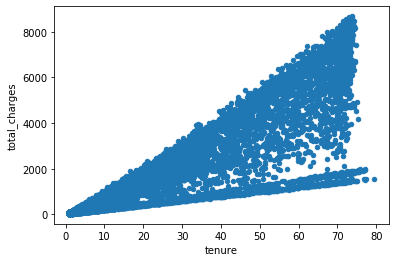

In [47]:
# Total charges? 

x= telco.tenure
y= telco.total_charges
print(stats.pearsonr(telco.tenure, telco.total_charges))
telco.plot.scatter(x='tenure', y='total_charges')

# Yes, positive correlation

In [ ]:
# What happens if you control for phone and internet service?


In [152]:
#2. Use the employees database.
from env import host, user, password
def get_db_url(host, user, password, database_name):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url

database_name = "employees"
url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
query = """SELECT
    e.*,
    datediff('2002-09-30', e.hire_date) tenure,
    t.title,
    t.from_date title_from,
    datediff('2002-09-30', t.from_date) t_tenure,
    et.titles,
    s.salary,
    s.from_date salary_from,
    datediff('2002-09-30', s.from_date) s_tenure,
    es.salaries
FROM
    employees e
JOIN 
    titles t 
    USING(emp_no)
JOIN 
    salaries s 
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) titles
    FROM
        titles
    GROUP BY
        emp_no) et
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) salaries
    FROM
        salaries
    GROUP BY
        emp_no) es
    USING(emp_no)
WHERE
    s.to_date > '2002-09-30'
    AND t.to_date > '2002-09-30'; """
employees = pd.read_sql(query, url)
employees

#pd.Series(delta.days for delta in (df['Left'] - df['Arrived'])) for date change
# salaries WHERE DATEDIFF(day, from_date, to_date)
# x = df_salaries.salary
# hire date, salary to_date > today
# inner join
# date.diff in sql to get a difference of days
# pd.date_range(from_date, to_date, )
# or treat date as a string 


# Is there a relationship between how long an employee has been with the company and their salary?

emp_sal = employees.salary.mean().str
# 72012.236
emp_ten = employees.tenure.mean().str
# 4626.878
# need to change dtype to str for stats to work
stats.pearsonr(emp_sal, emp_ten)

AttributeError: 'float' object has no attribute 'str'

In [ ]:
# Is there a relationship between how long an employee has been with the company and the number of titles they have had?

employees[employees.title]

In [41]:
# Use the sleepstudy data. Is there a relationship between days and reaction time?

# Ho: There is no relationship between the days and reaction time.
# We reject the null hypothesis

sleepstudy = data('sleepstudy')
sleepstudy

x = sleepstudy.Days
y = sleepstudy.Reaction

r, p = stats.pearsonr(x, y)
r, p

(0.5352302262650253, 9.894096322214812e-15)

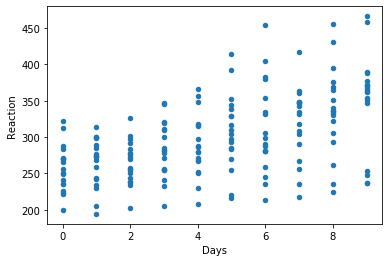

In [43]:
sleepstudy.plot.scatter(x='Days', y='Reaction')

# Chi Square

In [104]:
# Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

index = ['mac', 'no mac']
columns = ['codeup student', 'not codeup student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

chi2, p, degf, expected = stats.chi2_contingency(observed)

print('chi2:', chi2)
print('p:', p) 
print('degf:', degf)
print(expected)


chi2: 36.65264142122487
p: 1.4116760526193828e-09
degf: 1
[[34.5 34.5]
 [15.5 15.5]]


In [151]:
# Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. 
# Be sure to state your null and alternative hypotheses.

mpg.head(5)
n = mpg.shape[0]
car_class = mpg['class'].value_counts() / n
car_class
m_type = mpg['manufacturer'].value_counts() / n
m_type

expected = pd.DataFrame()

for class_group, c_prop in car_class.iteritems():
    for type_group, t_prop in m_type.iteritems():
        expected.loc[car_class, m_type] = c_prop * t_prop

expected.sort_index(inplace=True)
expected *= n



,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [150]:
# Use the data from the employees database to answer these questions:
employees.head(5)
# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

# Is an employee's gender independent of whether or not they are or have been a manager?

,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure,title,title_from,t_tenure,titles,salary,salary_from,s_tenure,salaries
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,5940,Senior Engineer,1986-06-26,5940,1,88958,2002-06-22,100,17
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,6157,Staff,1996-08-03,2249,1,72527,2001-08-02,424,6
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,5877,Senior Engineer,1995-12-03,2493,1,43311,2001-12-01,303,7
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,5782,Senior Engineer,1995-12-01,2495,2,74057,2001-11-27,307,16
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,4766,Senior Staff,1996-09-12,2209,2,94692,2001-09-09,386,13
